<a href="https://colab.research.google.com/github/agliev/Image_classification_profect/blob/main/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import**

In [298]:
import os
import numpy as np
import tensorflow as tf
from shutil import copy2
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.data.experimental import AUTOTUNE
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy

In [ ]:
learning_rate = 0.001 

# **Handwritten number recognition** by whole-connected model

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = x_train/255 # Нормализация полученных значений 
x_test = x_test/255

In [ ]:
y_train_cat = tf.keras.utils.to_categorical(y_train)
y_test_cat = tf.keras.utils.to_categorical(y_test)

In [ ]:
model = Sequential(layers=[ Flatten(input_shape=(28,28,1)), 
                            Dense(128, activation='relu'),
                            Dense(10, activation='softmax')]
                  )

In [ ]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [295]:
history = model.fit(x_train, y_train_cat, batch_size=32, epochs=30, validation_split=0.10, use_multiprocessing=True)

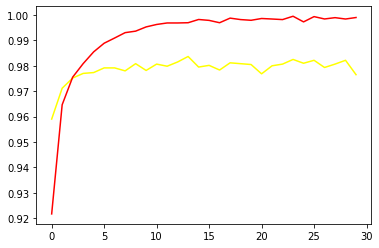

In [ ]:
plt.plot(history.history['val_accuracy'], color='yellow')
plt.plot(history.history['accuracy'], color='red')


In [ ]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 0s 2ms/step - loss: 0.1312 - accuracy: 0.9780


[0.1312418282032013, 0.9779999852180481]

In [ ]:
model_dropout = Sequential(layers=[ Flatten(input_shape=(28,28,1)), 
                            Dense(128, activation='relu'),
                            Dropout(0.6),
                            Dense(10, activation='softmax')]
                          )

model_dropout.compile(optimizer=Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_dropout = model_dropout.fit(x_train, y_train_cat, batch_size=32, epochs=150, validation_split=0.15, use_multiprocessing=True)

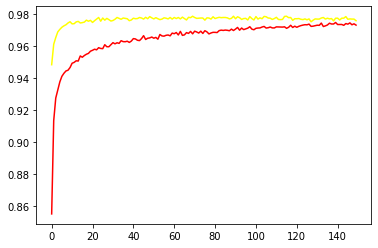

In [ ]:
plt.plot(history_dropout.history['val_accuracy'], color='yellow')
plt.plot(history_dropout.history['accuracy'], color='red')


In [ ]:
model_dropout.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.1680 - accuracy: 0.9765


[0.16804765164852142, 0.9764999747276306]

# **tiny_imagenet_200**: Preparations  

Выгрузим **tiny_imagenet_200** 

In [ ]:
# # Начнем с выгрузки zip файла, после распакуем его
# !wget http://cs231n.stanford.edu/tiny-imagenet-200.zip

# from zipfile import ZipFile 

# with ZipFile('Mail3.zip', 'r') as zipObj:
#    # Extract all the contents of zip file in current directory
#    zipObj.extractall()

In [ ]:
TRAIN_CAT_DIR = '/content/tiny-imagenet-200/train/' # Хранилице папок с фото по категориям
TRAIN_ALL_DIR = '/content/tiny-imagenet-200/train_all/' # Папка со всеми фото для обучения

In [ ]:
# for cat in os.listdir(TRAIN_CAT_DIR): # Выгружаем фото всех категорий в единую папку train_all
    
#     images_dir = TRAIN_CAT_DIR + cat + '/images/'

#     for image in os.listdir(images_dir):
#         copy2(images_dir+image, TRAIN_ALL_DIR)

In [283]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory( directory=TRAIN_CAT_DIR,
                                                                     validation_split=0.1,
                                                                     subset='training',
                                                                     seed=90,
                                                                     image_size=(64, 64)
                                                                                              ).cache().prefetch(AUTOTUNE)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory( TRAIN_CAT_DIR,
                                                                   validation_split=0.1,
                                                                   subset='validation',
                                                                   seed=90,
                                                                   image_size=(64, 64)
                                                                                              ).cache().prefetch(AUTOTUNE)

Found 100000 files belonging to 200 classes.
Using 90000 files for training.
Found 100000 files belonging to 200 classes.
Using 10000 files for validation.


# **tiny_imagenet_200**: Model

In [288]:
model = Sequential(name = 'Lenet')
model.add(tf.keras.Input(shape=(64, 64, 3)))

model.add(preprocessing.Rescaling(1 / 255))

model.add(Conv2D(6, 5, activation = 'relu', name = 'conv1'))
model.add(MaxPooling2D(pool_size = 2, strides = 2, name = "maxpool1"))

model.add(Conv2D(16, 5, activation = 'relu', name = "conv2"))
model.add(MaxPooling2D(pool_size = 2, strides = 2, name = "maxpool2"))

model.add(Flatten())

model.add(Dense(1000, activation = 'relu', name = "dence1"))
model.add(Dense(200, activation = 'softmax', name = "dense2"))

In [289]:
model.compile(optimizer=Adam(learning_rate), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
#model.summary()

In [291]:
model.fit(train_dataset, 
          validation_data=val_dataset,
          batch_size=32,
          epochs=1,
          use_multiprocessing=True)

2813/2813 [==============================] - 407s 145ms/step - loss: 4.4526 - accuracy: 0.0901 - val_loss: 4.1262 - val_accuracy: 0.1311


In [321]:
TEST_DIR = '/content/tiny-imagenet-200/test/images/'
test_ImageNames = os.listdir(TEST_DIR)

In [328]:
img = image.load_img(TEST_DIR+test_ImageNames[0])
img_num = image.img_to_array(img) 

In [349]:
# img_num = np.expand_dims(img_num, axis=0)
# img_num.shape
pred = np.argmax(model.predict(img_num)[0])


132